# Exercise: Learning Rate

Unit 5 - exercise 14 - Build model, adjust learning rate, see change in training

What we’re trying to teach:

- Learning rate
- See change in training speed
- Put learning rate too high
- Put it too low
- Tune it just right


## Preparing data
In this unit we are using fictional investment banking dataset, that correlates the amount of money accrued according to the age of accounts.



In [37]:
# Import everything we will need for this unit
import pandas as pd
import numpy as np
import operator
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


# Load data from our dataset file into a pandas dataframe
dataset = pd.read_csv('Data/investments.csv', index_col=False, sep=",",header=0)

# Check what's in the dataset
print(dataset.head())



                             Account ID  Account Age  Total Accrued
0  106440e8-775d-4357-8485-d3923036b6c1           48          41239
1  b2c6c687-9c1a-4171-86d2-3ccf3759931d           12            920
2  db5f9ba8-0b3c-4fed-87fd-665bb273cbda           43          27851
3  73aa1fe8-dece-4aa5-a763-ddee06ef5aab           25           4304
4  213b5e44-60ce-447a-b7c3-12b465828af8           31          12805


## Hyperparameters

........
### Learning Rate
The value that determines the "step size" taken in each iteration when minimizing the cost function (we will take a deeper look at this in the next Unit).





In the following exercises we will use a custom implementation of Polynomial Linear Regression that let's us set the hyperparameters. We will then compare the results to the previous model and see if **tuning** hyperparams can improve performance.

TIME IT

time
70.38192099571461


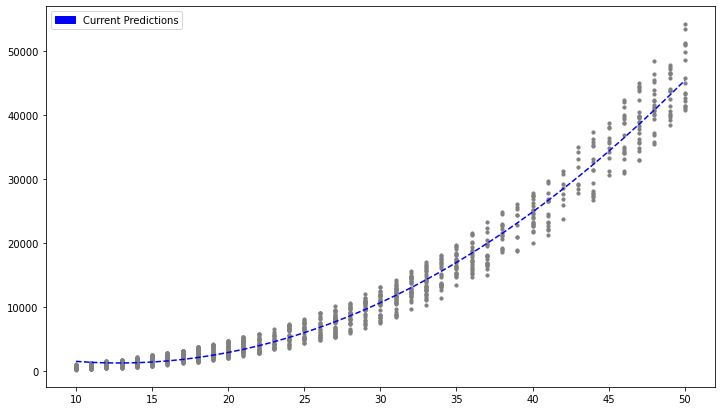

In [43]:

# Use a custom Polynomial Linear Regression implementation
# so we can set hyperparameters
import PolynomialLinearRegression as plr

X = dataset["Account Age"].values.reshape(-1,1)
y = dataset["Total Accrued"].values

# Initialize and train model
# setting values for learning rate and number of iterations
model2 = plr.PolynomialLinearRegression()
t0 = time.perf_counter()
weights2, J_history2 = model2.fit(X, y, learning_rate=0.2, num_iters=1800)
t1 = time.perf_counter()

print("time")
print((t1 - t0) * 1000)

# Generate predictions based on original dataset
y_hat2 = model2.predict(X)

# Plot previous and new predictions over datapoints
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_hat2), key=sort_axis)
X, y_hat2 = zip(*sorted_zip)
l2 = plt.plot(X, y_hat2, "--", color="blue")
# Add legend
blue_patch = mpatches.Patch(color="blue", label="Current Predictions")
plt.legend(handles=[blue_patch])
plt.show()

Ideal lr is 0.01
.....

time
88.11943500040798


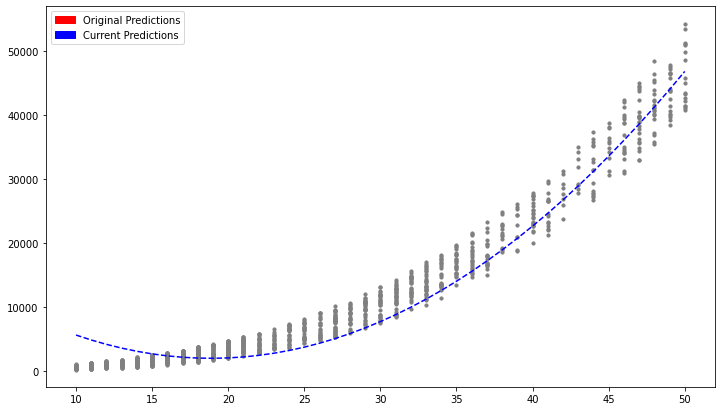

In [39]:
# retrain model, using 1000 iterations

# reset X and y
X = dataset["Account Age"].values.reshape(-1,1)
y = dataset["Total Accrued"].values

t0 = time.perf_counter()
weights3, J_history3 = model2.fit(X, y, learning_rate=0.001, num_iters=1800)
t1 = time.perf_counter()

print("time")
print((t1 - t0) * 1000)

# Generate predictions based on original dataset
y_hat3 = model2.predict(X)

# Plot previous and new predictions over datapoints
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_hat3), key=sort_axis)
X, y_hat3 = zip(*sorted_zip)
l1 = plt.plot(X, y_hat2, color="red")
l2 = plt.plot(X, y_hat3, "--", color="blue")
# Add legend
red_patch = mpatches.Patch(color="red", label="Original Predictions")
blue_patch = mpatches.Patch(color="blue", label="Current Predictions")
plt.legend(handles=[red_patch, blue_patch])
plt.show()

Draw a conclusion



## Summary

In this exercise .....